In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# N = size of the dataset
# d = number of dimensions of the input vector space
# Create a table of distances of N*N size.
# Create a table of distances of N*N size. (for reduced dimension points)
# Compute Pij and Qij probability values.
# Implement the Kullback-Leibler Cost function. 

NEIGHBOUR_SIZE = 3
EPOCHS = 1000
LR = 0.001
MOMENTUM = 0.99
GAUSSIAN_VARIANCE = 1

def getkey(list):
    return list[1]

# This function gets all the neighbours of a given point in d-dimensinal space.
# This function returns a list of nearest {NEIGHBOUR_SIZE} vectors as neighbours.
def get_neighbours(X, index_X1, dimension):
    neighbours = []

    # x_1 is the vector for which have to find the neighbours.
    x_1 = X[index_X1]

    for index in range(X.shape[0]):
        if (index != index_X1):
            # For each xᵢ 
            x_i = X[index]

            # Calculate the distance based on the formula which changes for higher dimensional and lower dimensional data.
            if (dimension == "p"):
                distance = np.exp(-np.linalg.norm( x_1 - x_i )**2 / (2*(GAUSSIAN_VARIANCE**2)))
            else:
                distance = (1+np.linalg.norm( x_1 - x_i )**2)**-1
            neighbours.append([index,distance])

    # Sort the vectors according to their distance to our target vector
    neighbours = sorted(neighbours, key=getkey)

    # return the specified number of vectors as neighbours.
    return neighbours[:NEIGHBOUR_SIZE]



# This function computes the similarity Pij between two points Xi, Xj in the original space
def compute_Pij(X, index1, index2):
    x1 = X[index1]
    x2 = X[index2]

    denom = 0
    num = np.exp(-np.linalg.norm(x1-x2)**2)/(2*GAUSSIAN_VARIANCE**2)

    neighbours = get_neighbours(X, index1, 'p')
    for neighbour in neighbours:
        denom+=neighbour[1]
    Pij = num/denom

    return Pij

# This function computes the similarity Qij between two points Yi, Yj in the reduced space
def compute_Qij(Y, index1, index2):
    y1 = Y[index1]
    y2 = Y[index2]

    denom = 0
    num = (1+np.linalg.norm(y1 - y2)**2)**-1

    neighbours = get_neighbours(Y, index1, 'q')
    for neighbour in neighbours:
        denom+=neighbour[1]
    Qij = num/denom

    return Qij
    

# This function computes the P table for xij in the original space
def compute_P(X):
    points = X.shape[0]
    table = np.zeros((points, points))

    for i in range(points):
        for j in range(points):
            # skip computation if the comparing point is the point itself
            if i == j:
                continue
            pij = compute_Pij(X, i, j)
            pji = compute_Pij(X, j, i)
            table[i, j] = (pij+pji)/(2*points)
    return table

# This function computes the P table for xij in the original space
def compute_Q(Y):
    points = Y.shape[0]
    table = np.zeros((points, points))

    for i in range(points):
        for j in range(points):
            # skip computation if the comparing point is the point itself
            if i == j:
                continue
            qij = compute_Qij(Y, i, j)
            qji = compute_Qij(Y, j, i)
            table[i, j] = (qij+qji)/(2*points)
    return table
            


# This function computes the error between 2 distributions using KL Divergence
def KL_divergence(p, q):
    err=0
    p_points = p.shape[0]
    q_points = q.shape[0]

    for i in range(p_points):
        for j in range(q_points):
            if p[i,j] == 0 or q[i,j] == 0:
                continue
            err+=p[i,j]*np.log(p[i,j]/q[i,j])
    
    return err

def update_gradHistory(grad_history, point, val):
    grad_history[point, 0] = grad_history[point, 1]
    grad_history[point, 1] = val
    return grad_history

def normalize(y):
    y-=np.mean(y)
    y/=np.std(y)
    return y

# This function applies the gradient descent approach to lower the KL Divergence error and momentum is added to increase the speed
def Gradient_Descent(y,p,q):
    y_dim = y.shape[1]
    y_points = y.shape[0]
    p_points = p.shape[0]

    grad_history = np.zeros((p_points, 2, y_dim))

    for epoch in range(EPOCHS):
        for i in range(y_points):
            total = 0
            
            for j in range(y_points):
                total+=((y[i]-y[j])*(p[i,j]-q[i,j])*(1+np.linalg.norm(y[i]-y[j]**2))**-1)
            
            y[i]-=4*LR*total+MOMENTUM*(grad_history[i,1]-grad_history[i,0])
            grad_history = update_gradHistory(grad_history, i, y[i])
        
        if epoch%50==0:
            q = compute_Q(y)
            print(KL_divergence(p,q))
    
    y = normalize(y)

    return y
            


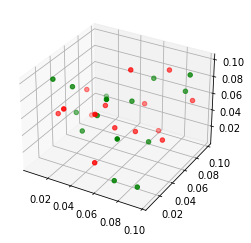

-7.746610583405118
-7.146635089403827
-6.715176779898707
-6.4391040138589535
-6.2783270927530745
-6.194724778317008
-6.159526983004553
-6.153748573012695
-6.165748999954667
-6.188489019508452
-6.217830737590234
-6.251009437495332
-6.286465304749975
-6.323323201650885
-6.3610899759463875
-6.399395264827611
-6.438162244254867
-6.4771636768296075
-6.516430112677804
-6.555641891765049
[[ 0.48642315 -1.26069433]
 [ 1.04241251 -0.3846289 ]
 [-0.05960047 -1.59182676]
 [ 1.99733386  0.27303346]
 [ 1.50210575  0.42716422]
 [-0.40243667  0.76335722]
 [ 0.54066167 -0.5488622 ]
 [ 0.40708717 -1.05362075]
 [-0.63548425 -0.96664354]
 [ 1.37618086 -1.40371324]
 [ 0.85973754 -1.63024829]
 [ 2.56180936  0.12489396]
 [ 0.53378556 -1.00597376]
 [-0.37589061 -1.70730298]
 [-0.72061954 -0.48833003]
 [-0.75987701 -0.99611288]
 [-0.31511254  0.2485616 ]
 [ 1.60352788  0.74584255]
 [ 0.76058032 -0.35227098]
 [ 0.53213736  0.67064458]
 [ 0.269342   -1.60104502]
 [ 0.40020293 -0.49924819]
 [ 0.67795843 -1.34601

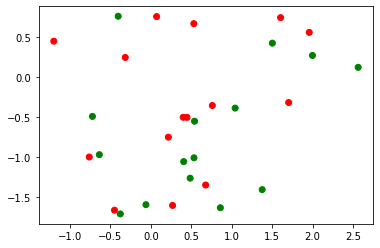

In [6]:
def main():
    dataset = np.random.rand(30, 3)
    dataset[:30]*=0.1
    color = ['green']*15+['red']*15
    
    P = compute_P(dataset)
    
    # Y is the list of vectors     
    Y = dataset.dot(np.random.rand(dataset.shape[1],2))
    Y = normalize(Y)

    Q  = compute_Q(Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2], color=color)
    plt.show()

    Y = Gradient_Descent(Y,P,Q)
    print(Y)
    plt.scatter(Y[:,0],Y[:,1] ,color=color)
    plt.show()

main()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91b88fa6-f59f-4abe-b3f7-36387f861c87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>